In this notebook, we will explore some more operations, such as calculating the logarithm in numpy and doing a linear regression.

You have the following isothermic reaction:
$A+\frac{1}{6}B→\frac{1}{4}C+\frac{1}{2}D$

During a laboratory experiment you measure in a batch reactor with constant volume and the initial concentration of $C_A$ is 25 $mol \cdot m^{-3}$.

In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt

# define a distribution of CC
cc = np.linspace(0, 4, 11)
time = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

# create a pandas dataframe with the data we simulated 
df = pd.DataFrame()
df['Time'] = time
df['Cc'] = cc

In [2]:
# create a function to calculate CA given CC and CA0
def calculate_CA(C_A0, Cc):
    C_A = C_A0-(4*Cc)
    return C_A

# Looking at the stochiometry, we know that CA can be calculated from CC and CA0
df['Ca'] = calculate_CA(25, df['Cc'])

### Finding the logarithm of a value in Python

Here we will use the numpy library to calculate the logarithm of the values defined.

In [3]:
# find the log of CA
df['ln(Ca)'] = round(np.log(df['Ca']), 2)

### Simple linear regression in Python with SciPy library

Here we calculate a linear least-squares regression for two sets of measurements.
Check the documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html).

The unction returns:
- Slope of the regression line
- Intercept of the regression line
- The Pearson correlation coefficient. The square of rvalue is equal to the coefficient of determination
- The p-value for a hypothesis test whose null hypothesis is that the slope is zero, using Wald Test with t-distribution of the test statistic. See alternative above for alternative hypotheses
- Standard error of the estimated slope (gradient), under the assumption of residual normality
- Standard error of the estimated intercept, under the assumption of residual normality

In [4]:
df

,Time,Cc,Ca,ln(Ca)
0,0,0.0,25.0,3.22
1,2,0.4,23.4,3.15
2,4,0.8,21.8,3.08
3,6,1.2,20.2,3.01
4,8,1.6,18.6,2.92
5,10,2.0,17.0,2.83
6,12,2.4,15.4,2.73
7,14,2.8,13.8,2.62
8,16,3.2,12.2,2.50
9,18,3.6,10.6,2.36


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\fiacac\AppData\Local\Temp/ipykernel_15964/2368782444.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


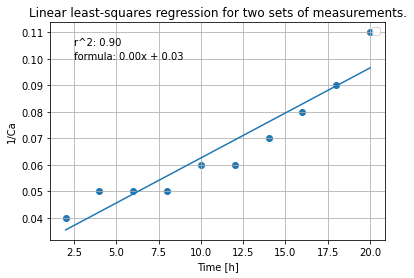

In [5]:
df['1/Ca'] = round(1/df['Ca'], 2)

# linear least-squares regression
m, b, r_value, p_value, std_err = scipy.stats.linregress(df['Time'].iloc[1:], df['1/Ca'].iloc[1:])

#plotting the results and annotating the plot
fig, ax = plt.subplots()
ax.scatter(df['Time'].iloc[1:], df['1/Ca'].iloc[1:])
ax.plot(df['Time'].iloc[1:], m*df['Time'].iloc[1:] + b)
ax.annotate('r^2: ' + str("{:.2f}".format(r_value**2)), xy=(2.5, 0.105))
ax.annotate('formula: ' + str("{:.2f}".format(m)) + 'x + ' + str("{:.2f}".format(b)), xy=(2.5, 0.10))
plt.title('Linear least-squares regression for two sets of measurements.')
plt.xlabel('Time [h]')
plt.ylabel('1/Ca')
plt.legend()
plt.grid()
fig.show()